In [1]:
# %load /home/sid/libs.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.io.arff import loadarff
%matplotlib inline

In [2]:
def test_data_prep(*files):
    test_data = [pd.DataFrame(loadarff(file)[0]) for file in files]
    for i in range(len(test_data)):
        test_data[i]['class'].replace([b'0', b'1'], [0, 1], inplace = True)
    return test_data

In [3]:

test_df = test_data_prep('data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff')
test_df

[         Attr1     Attr2     Attr3      Attr4     Attr5     Attr6     Attr7  \
 0     0.200550  0.379510  0.396410    2.04720   32.3510  0.388250  0.249760   
 1     0.209120  0.499880  0.472250    1.94470   14.7860  0.000000  0.258340   
 2     0.248660  0.695920  0.267130    1.55480   -1.1523  0.000000  0.309060   
 3     0.081483  0.307340  0.458790    2.49280   51.9520  0.149880  0.092704   
 4     0.187320  0.613230  0.229600    1.40630   -7.3128  0.187320  0.187320   
 5     0.228220  0.497940  0.359690    1.75020  -47.7170  0.000000  0.281390   
 6     0.111090  0.647440  0.289710    1.47050    2.5349  0.000000  0.111090   
 7     0.532320  0.027059  0.705540   53.95400  299.5800  0.000000  0.652400   
 8     0.009020  0.632020  0.053735    1.12630  -37.8420  0.000000  0.014434   
 9     0.124080  0.838370  0.142040    1.16940  -91.8830  0.000000  0.153280   
 10    0.240010  0.443550  0.188350    1.44000  -21.1650 -0.931900  0.240010   
 11   -0.027117  0.111480  0.119890    2

In [4]:
def test_train_splitter(data):
    X_train_2 = []
    X_test_2 = []
    y_train_2 = []
    y_test_2 = []
    for i in range(len(data)):
        X, y = data[i].iloc[:,:-1], data[i]['class']
        X.drop(['Attr37', 'Attr21', 'Attr60', 'Attr45'], axis=1, inplace=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
        X_train_2.append(X_train)
        X_test_2.append(X_test)
        y_train_2.append(y_train)
        y_test_2.append(y_test)
    X_train_fin = pd.concat(X_train_2)
    X_test_fin = pd.concat(X_test_2)
    y_train_fin = pd.concat(y_train_2)
    y_test_fin = pd.concat(y_test_2)
    return X_train_fin, X_test_fin, y_test_fin, y_train_fin
        
X_train, X_test, y_test, y_train = test_train_splitter(test_df)

X_train2 = X_train.reset_index(drop=True)
X_test2 = X_test.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)


In [5]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((34722, 60), (34722,), (8683, 60), (8683,))

In [6]:
def get_me_mah_model(X_train, y_train, X_test, y_test, Model):
    model = Model(random_state=9)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print "f1_score", f1_score(y_test, y_pred)
    print "precision_score", precision_score(y_test, y_pred)
    print "recall_score", recall_score(y_test, y_pred)
    print "roc_auc_score", roc_auc_score(y_test, y_pred)
    print "cm matrix", confusion_matrix(y_test, y_pred)
    scores = [n for m, n in model.predict_proba(X_test)]
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    plt.plot(fpr, tpr)
    plt.plot([(0,0), (1,1)])
    len(y_test[y_test == 1])

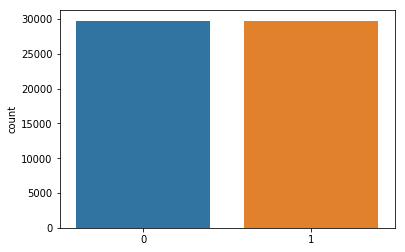

In [7]:
X_train3 = X_train2.dropna()
y_train3 = y_train2.iloc[X_train3.index]
X_test3 = X_test2.dropna()
y_test3 = y_test2.iloc[X_test3.index]
smote = SMOTE(random_state=9, kind = 'borderline2')
X_smote, y_smote = smote.fit_sample(X_train3, y_train3)
sns.countplot(y_smote)
plt.show()

In [8]:
y_train3.value_counts()

0    29758
1     1008
Name: class, dtype: int64

f1_score 0.115732368897
precision_score 0.065775950668
recall_score 0.481203007519
roc_auc_score 0.617313832527
cm matrix [[5555 1818]
 [ 138  128]]


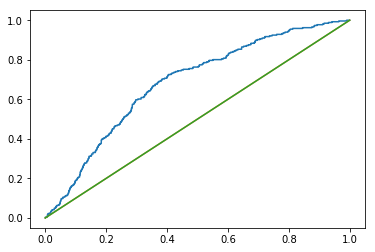

In [9]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, LogisticRegression)

In [10]:
from sklearn.ensemble import RandomForestClassifier

f1_score 0.347368421053
precision_score 0.325657894737
recall_score 0.372180451128
roc_auc_score 0.672188150425
cm matrix [[7168  205]
 [ 167   99]]


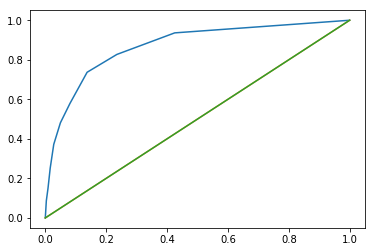

In [11]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, RandomForestClassifier)

In [12]:
# RandomForestClassifier(n_estimators=)

f1_score 0.355008787346
precision_score 0.333333333333
recall_score 0.37969924812
roc_auc_score 0.676150993923
cm matrix [[7171  202]
 [ 165  101]]


266

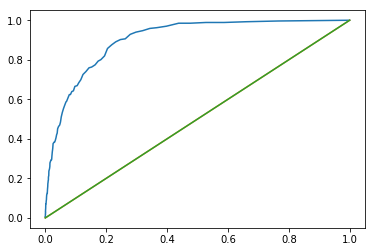

In [13]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test3)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test3)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1])

In [14]:
model.feature_importances_[np.argsort(model.feature_importances_)]

array([ 0.00630347,  0.00662617,  0.00679031,  0.00694266,  0.00697549,
        0.00699129,  0.00699982,  0.00724173,  0.00741936,  0.0074792 ,
        0.00757833,  0.00766297,  0.00784434,  0.00825398,  0.00896061,
        0.00902348,  0.00907855,  0.00913328,  0.00917612,  0.00919463,
        0.00924739,  0.00929204,  0.00930566,  0.00949619,  0.00949817,
        0.00966172,  0.00985586,  0.01001162,  0.01050858,  0.01073604,
        0.01079073,  0.01086018,  0.01139049,  0.0124841 ,  0.01250687,
        0.01331909,  0.01337825,  0.01367599,  0.0142104 ,  0.01471971,
        0.01485953,  0.01543314,  0.01567425,  0.01580146,  0.01639096,
        0.01729992,  0.02123179,  0.02143185,  0.02330757,  0.02469667,
        0.02542081,  0.02651683,  0.02940631,  0.03880246,  0.04092659,
        0.04282648,  0.04565112,  0.05577875,  0.05642551,  0.07149314])

In [15]:
features_imp = pd.Series(data=model.feature_importances_, index=X_test3.columns)

In [30]:
sorted_features = features_imp.sort_values(ascending=False)
sorted_features

Attr34    0.071493
Attr15    0.056426
Attr25    0.055779
Attr13    0.045651
Attr41    0.042826
Attr6     0.040927
Attr39    0.038802
Attr27    0.029406
Attr16    0.026517
Attr26    0.025421
Attr35    0.024697
Attr58    0.023308
Attr9     0.021432
Attr29    0.021232
Attr14    0.017300
Attr46    0.016391
Attr5     0.015801
Attr42    0.015674
Attr59    0.015433
Attr1     0.014860
Attr38    0.014720
Attr55    0.014210
Attr61    0.013676
Attr22    0.013378
Attr23    0.013319
Attr51    0.012507
Attr19    0.012484
Attr18    0.011390
Attr56    0.010860
Attr10    0.010791
Attr31    0.010736
Attr24    0.010509
Attr33    0.010012
Attr47    0.009856
Attr36    0.009662
Attr20    0.009498
Attr30    0.009496
Attr62    0.009306
Attr44    0.009292
Attr64    0.009247
Attr8     0.009195
Attr2     0.009176
Attr3     0.009133
Attr11    0.009079
Attr32    0.009023
Attr17    0.008961
Attr12    0.008254
Attr40    0.007844
Attr57    0.007663
Attr7     0.007578
Attr48    0.007479
Attr49    0.007419
Attr63    0.

In [17]:
sorted_features.index

Index([u'Attr34', u'Attr15', u'Attr25', u'Attr13', u'Attr41', u'Attr6',
       u'Attr39', u'Attr27', u'Attr16', u'Attr26', u'Attr35', u'Attr58',
       u'Attr9', u'Attr29', u'Attr14', u'Attr46', u'Attr5', u'Attr42',
       u'Attr59', u'Attr1', u'Attr38', u'Attr55', u'Attr61', u'Attr22',
       u'Attr23', u'Attr51', u'Attr19', u'Attr18', u'Attr56', u'Attr10',
       u'Attr31', u'Attr24', u'Attr33', u'Attr47', u'Attr36', u'Attr20',
       u'Attr30', u'Attr62', u'Attr44', u'Attr64', u'Attr8', u'Attr2',
       u'Attr3', u'Attr11', u'Attr32', u'Attr17', u'Attr12', u'Attr40',
       u'Attr57', u'Attr7', u'Attr48', u'Attr49', u'Attr63', u'Attr43',
       u'Attr52', u'Attr54', u'Attr28', u'Attr53', u'Attr50', u'Attr4'],
      dtype='object')

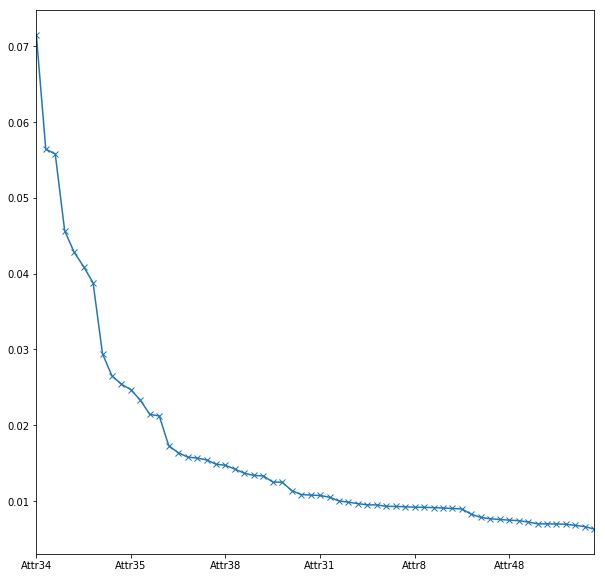

In [18]:
plt.figure(figsize=(10,10))
sorted_features.plot(marker='x')
# plt.xticks(features_imp.index)

In [19]:
len(sorted_features.index)

60

In [20]:
# significance covered by sorted features
sorted_features[sorted_features > 0.01].sum()

0.7779671773787814

In [21]:
selected_features = sorted_features[sorted_features > 0.01]

In [22]:
selected_features.shape

(33,)

In [23]:
X_smote2 = pd.DataFrame(data=X_smote, columns=X_train3.columns)[selected_features.index].copy()
X_test4 = X_test3[selected_features.index].copy()


f1_score 0.377816291161
precision_score 0.350482315113
recall_score 0.40977443609
roc_auc_score 0.691188587908
cm matrix [[7171  202]
 [ 157  109]]


(266, 311)

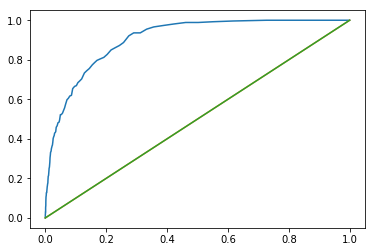

In [24]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote2, y_smote)
y_pred = model.predict(X_test4)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test4)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]), len(y_pred[y_pred == 1])

In [25]:
X_smote3 = X_smote2.copy()
for col in X_smote2.columns:
    X_smote3[col] = np.log(X_smote2[col] + 1 - min(X_smote2[col]))

In [26]:
X_test5 = X_test4.copy()
for col in X_test4.columns:
    X_test5[col] = np.log(X_test4[col] + 1 - min(X_test4[col]))

In [27]:
X_smote2.shape

(59515, 33)

f1_score 0.0
precision_score 0.0
recall_score 0.0
roc_auc_score 0.5
cm matrix [[7373    0]
 [ 266    0]]


/home/sid/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sid/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(266, 0)

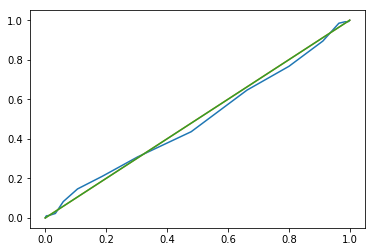

In [28]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote3, y_smote)
y_pred = model.predict(X_test5)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test5)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]), len(y_pred[y_pred == 1])

In [29]:
X_

NameError: name 'X_' is not defined